|Name:|Tufan Kundu|
|-|-|
|Registration no:|24MDT0184|
|Course Name:|Deep Learning Lab|
|Course Code:|PMDS603P|
|Digital Assessment:|2|

## Question1. Today, we will try to recall the work done in the previous lab first. The second problem attempted in the last lab was to use MNIST dataset which contains handwritten numbers (their images) from 0 to 9 digits. First try to fit a simple neural network model. Let us import the necessary modules required for this along with the dataset. It contains 70000 handwritten images of digits from 0 to 9. So its a 10 class classification problem. Lets try to create a model that can do the classification task.

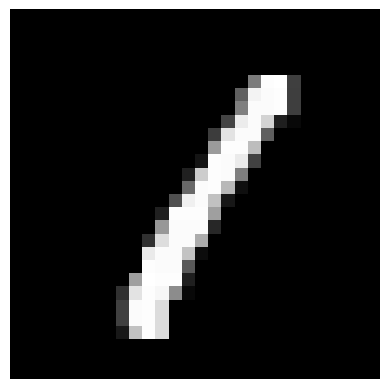

In [4]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.optimizers import SGD
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
batch_size = 128
num_classes = 10
epochs = 50
(x_train,y_train), (x_test,y_test) = mnist.load_data()
plt.imshow(x_train[3],cmap='gray')
plt.axis('off')
plt.show()

In [5]:
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train/=255
x_test/=255
print(x_train.shape[0],'train samples')
print(x_test.shape[0],'test samples')
y_train = keras.utils.to_categorical(y_train,num_classes)
y_test_ = keras.utils.to_categorical(y_test,num_classes)

60000 train samples
10000 test samples


### Without dropout with ReLU activation

In [6]:
model = Sequential()
model.add(Dense(512, activation = 'relu',input_shape = (784,)))
model.add(Dense(512, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))
model.summary()
sgd1 = SGD(learning_rate=0.01)
model.compile(loss = 'categorical_crossentropy', optimizer = sgd1, metrics = ['accuracy'])
history = model.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test,y_test_))

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 669,706 (2.55 MB)

 Trainable params: 669,706 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.6011 - loss: 1.6053 - val_accuracy: 0.8828 - val_loss: 0.5087
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8802 - loss: 0.4768 - val_accuracy: 0.9051 - val_loss: 0.3595
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8989 - loss: 0.3613 - val_accuracy: 0.9145 - val_loss: 0.3125
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9107 - loss: 0.3174 - val_accuracy: 0.9214 - val_loss: 0.2854
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9158 - loss: 0.2946 - val_accuracy: 0.9269 - val_loss: 0.2666
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9220 - loss: 0.2774 - val_accuracy: 0.9301 - val_loss: 0.2509
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9259 - loss: 0.2599 - val_accuracy: 0.9323 - val_loss: 0.2413
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9323 - loss: 0.2392 - val_accuracy: 0.

In [7]:
score = model.evaluate(x_test,y_test_, verbose = 1)
print("Test loss:", score[0])
print(f"Test Accuracy:{score[1]*100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9668 - loss: 0.1081
Test loss: 0.09124796092510223
Test Accuracy:97.24%


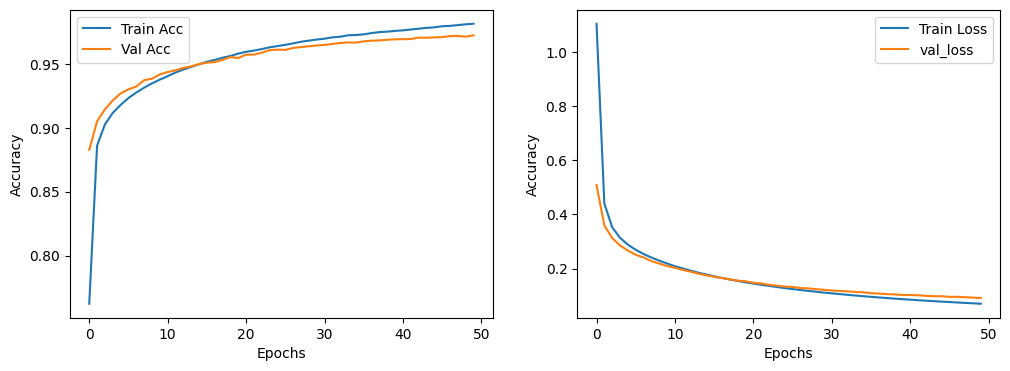

In [8]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Without dropout using sigmoid activation

In [9]:
model = Sequential()
model.add(Dense(512, activation = 'sigmoid',input_shape = (784,)))
model.add(Dense(512, activation = 'sigmoid'))
model.add(Dense(10, activation = 'softmax'))
model.summary()
sgd1 = SGD(learning_rate=0.01)
model.compile(loss = 'categorical_crossentropy', optimizer = sgd1, metrics = ['accuracy'])
history = model.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test,y_test_))
score = model.evaluate(x_test,y_test_, verbose = 1)
print("Test loss:", score[0])
print(f"Test Accuracy:{score[1]*100:.2f}%")

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 669,706 (2.55 MB)

 Trainable params: 669,706 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.1307 - loss: 2.2957 - val_accuracy: 0.2895 - val_loss: 2.2310
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.3464 - loss: 2.2137 - val_accuracy: 0.3752 - val_loss: 2.1390
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.4897 - loss: 2.1150 - val_accuracy: 0.6444 - val_loss: 2.0076
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5914 - loss: 1.9729 - val_accuracy: 0.5940 - val_loss: 1.8208
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6405 - loss: 1.7719 - val_accuracy: 0.7126 - val_loss: 1.5753
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.6928 - loss: 1.5271 - val_accuracy: 0.7186 - val_loss: 1.3310
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.7367 - loss: 1.2956 - val_accuracy: 0.7665 - val_loss: 1.1272
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7633 - loss: 1.1038 - val_accuracy: 0

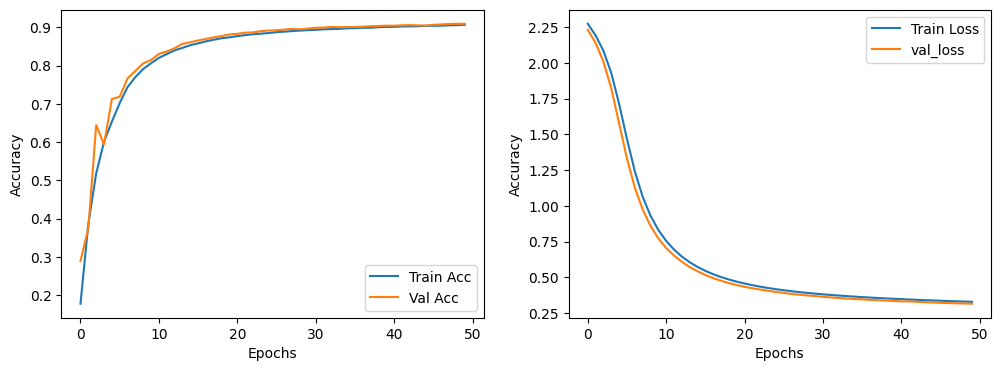

In [10]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

- ## Regularization Techniques

### Using dropout(0.2)

In [11]:
model = Sequential()
model.add(Dense(512, activation = 'relu',input_shape = (784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation = 'softmax'))
model.summary()
sgd1 = SGD(learning_rate=0.01)
model.compile(loss = 'categorical_crossentropy', optimizer = sgd1, metrics = ['accuracy'])
history = model.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test,y_test_))
score = model.evaluate(x_test,y_test_, verbose = 1)
print("Test loss:", score[0])
print(f"Test Accuracy:{score[1]*100:.2f}%")

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 669,706 (2.55 MB)

 Trainable params: 669,706 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.4983 - loss: 1.7143 - val_accuracy: 0.8674 - val_loss: 0.5604
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.8367 - loss: 0.5906 - val_accuracy: 0.8942 - val_loss: 0.3843
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8694 - loss: 0.4529 - val_accuracy: 0.9083 - val_loss: 0.3272
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8891 - loss: 0.3852 - val_accuracy: 0.9164 - val_loss: 0.2954
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8969 - loss: 0.3535 - val_accuracy: 0.9227 - val_loss: 0.2733
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9035 - loss: 0.3264 - val_accuracy: 0.9254 - val_loss: 0.2565
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9127 - loss: 0.3057 - val_accuracy: 0.9301 - val_loss: 0.2421
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9179 - loss: 0.2835 - val_accuracy: 

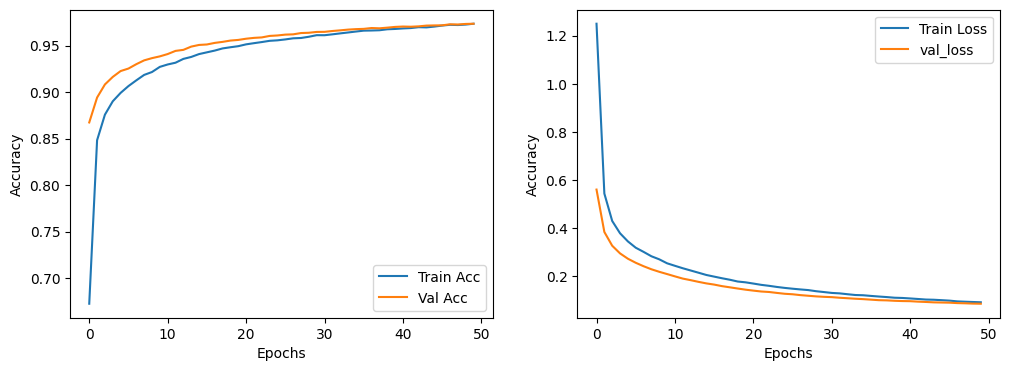

In [12]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Early stopping

In [14]:
from sklearn.model_selection import train_test_split
(x_train,y_train),(x_test,y_test) = mnist.load_data()
x_subtrain,x_valid,y_subtrain,y_valid = train_test_split(x_train,y_train,test_size = 0.10, random_state = 1)
x_train = x_train/255
x_test = x_test/255
x_subtrain = x_subtrain/255
x_valid=x_valid/255

### making the ANN

In [15]:
model = Sequential()
model.add(Flatten(input_shape = (28,28)))
model.add(Dense(512, activation = 'relu'))
model.add(Dense(512, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))
model.summary()
sgd1 = SGD(learning_rate=0.01)

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 669,706 (2.55 MB)

 Trainable params: 669,706 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
from keras.callbacks import EarlyStopping
model.compile(loss= 'sparse_categorical_crossentropy',optimizer = sgd1,metrics = ['accuracy'])
estop = EarlyStopping(monitor = 'val_loss', min_delta = 1e-3, mode = 'min', patience = 4, verbose = 1, restore_best_weights= True)
history = model.fit(x_subtrain,y_subtrain, batch_size=batch_size, epochs = 100, verbose = 1, validation_data=(x_valid,y_valid))

Epoch 1/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.5949 - loss: 1.6476 - val_accuracy: 0.8600 - val_loss: 0.5826
Epoch 2/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8701 - loss: 0.5185 - val_accuracy: 0.8885 - val_loss: 0.4104
Epoch 3/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8935 - loss: 0.3859 - val_accuracy: 0.9037 - val_loss: 0.3525
Epoch 4/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9050 - loss: 0.3394 - val_accuracy: 0.9103 - val_loss: 0.3219
Epoch 5/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9129 - loss: 0.3069 - val_accuracy: 0.9160 - val_loss: 0.3012
Epoch 6/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9180 - loss: 0.2882 - val_accuracy: 0.9188 - val_loss: 0.2832
Epoch 7/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9247 - loss: 0.2650 - val_accuracy: 0.9240 - val_loss: 0.2690
Epoch 8/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9286 - loss: 0.2531 - val_accu

In [17]:
score = model.evaluate(x_test,y_test, verbose = 1)
print("Test loss:", score[0])
print(f"Test Accuracy:{score[1]*100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9736 - loss: 0.0866
Test loss: 0.07452523708343506
Test Accuracy:97.74%


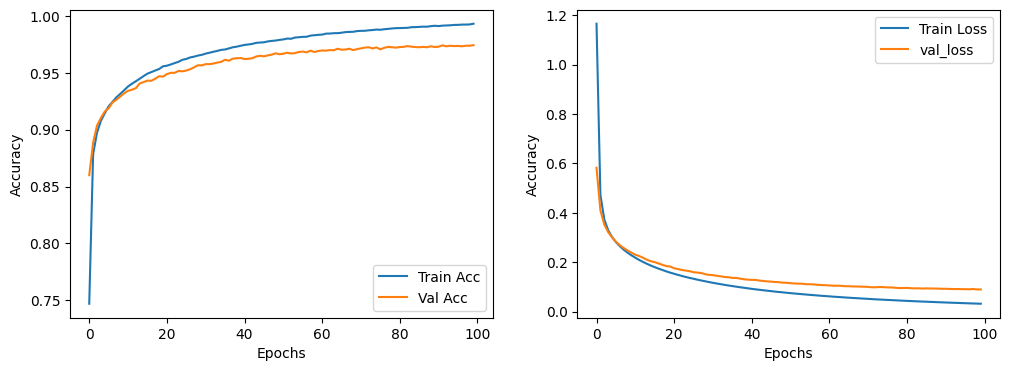

In [18]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Challenging Question: Try for a scratch code for this case where you can create a custom neural network without using any inbuilt classes like sequential etc. Where you need to define a class neural network which has methods like forwardpass, backwardpass, and train. Figure out how we can do this. This model has inputs as [0, 0, 1], [0, 1, 1], [1, 0, 1], [1, 1, 1] and the expected output as [0], [1], [1], [0] in each case. So there are three features in our dataset as you see above. The activation function is to be taken as sigmoid. The architecture is like we have only one hidden layer and an output layer with one neuron. Take the error function as (1/2)(y − yˆ)^2

In [19]:
import numpy as np

# sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# derivative of sigmoid function
def sigmoid_derivative(x):
    return x*(1-x)

# mean squared error loss
def mse_loss(y_true,y_pred):
    return 0.5*np.mean((y_true-y_pred)**2)

# Input dataset (XOR gate inputs with bias term)
x = np.array([[0,0,1],
[0,1,1],
[1,0,1],
[1,1,1]])

# output labels
y = np.array([[0],
[1],
[1],
[0]])

# seed for reproducibility
np.random.seed(1)

# Initialize weights randomly with mean 0
input_size = 3 # 3 input features
hidden_size = 2 # 2 hidden layers
output_size = 1 # 1 output neuron
# Weights
w1 = 2 * np.random.random((input_size, hidden_size))-1
w2 = 2 * np.random.random((hidden_size, output_size))-1
# Biases
b1 = np.zeros((1, hidden_size))
b2 = np.zeros((1, output_size))
# Learning rate
lr = 0.1
# Training loop

for epoch in range(10000):
    ##------------- Forward pass -------------------
    a1 = np.dot(x,w1) + b1
    h1 = sigmoid(a1) # activation of hidden layer
    a2 = np.dot(h1,w2) + b2
    output = sigmoid(a2) # final prediction
    # loss calculation
    loss = mse_loss(y,output)
    ##-------------- Back propagation ---------------
    # output layer error
    output_error = output - y
    output_delta = output_error * sigmoid_derivative(output)
    ## hidden layer error
    hidden_error = np.dot(output_delta, w2.T)
    hidden_delta = hidden_error * sigmoid_derivative(h1)
    ##------------Updating weights and biases -----------
    w2 -= lr * np.dot(h1.T,output_delta)
    b2 -= lr * np.sum(output_delta, axis = 0, keepdims = True)
    w1 -= lr * np.dot(x.T, hidden_delta)
    b1 -= lr * np.sum(hidden_delta, axis = 0, keepdims = True)
    # Print loss every 1000 epochs
    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")
# --------- Final Output ---------
print("\nFinal predictions after training:")
print(output.round(3))

Epoch 0, Loss: 0.1267
Epoch 1000, Loss: 0.1215
Epoch 2000, Loss: 0.1029
Epoch 3000, Loss: 0.0905
Epoch 4000, Loss: 0.0828
Epoch 5000, Loss: 0.0433
Epoch 6000, Loss: 0.0105
Epoch 7000, Loss: 0.0049
Epoch 8000, Loss: 0.0031
Epoch 9000, Loss: 0.0022

Final predictions after training:
[[0.049]
 [0.945]
 [0.945]
 [0.071]]


## Question2. 
### cifar10 dataset is also an inbuilt dataset which contains 10 classes of images, mainly, 0-airplane, 1-automobile, 2-bird, 3-cat, 4-deer, 5-dog, 6-frog, 7-horse, 8-ship, 9-truck.Load the inbuilt dataset cifar10 as you did in last lab by replacing mnist.load datae() as cifar10.load data(). First, try to import it from keras.datasets as you did for mnist. Now, identify the size of the images you have first of all. You can now see 32 * 32 * 3 images that is 32* 32 pixel images with 3 channels that give the RGB values since we have a color image. Try to print the shape of each image and see. you will see it’s stored like 32 * 32 *3 arrays. Now, try to visualize certain images using appropriate functions. Check the size of x train and x test and reshape them into one-dimensional arrays as done in the case of mnist dataset. Do necessary pre-processing and split the data into training, validation, and testing sets. Create a new model using a sequential class with appropriate hidden layers and output layer neurons. Choose appropriate activation functions like sigmoid and relu, etc. And also an appropriate one in the output layer. Choose the error function appropriately. Include early stopping technique in your model and run the model for 500 epochs. Try to come up with a better model with decent accuracy.The choice we have taken in the model here may not be the appropriate one. But you can see the accuracy you are able to come up with without having overfitting happen there.

### Importing the necessary libraries

In [20]:
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.optimizers import Adam,SGD
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.regularizers import l2
import warnings
warnings.filterwarnings('ignore')

### Loading the dataset and validation split

In [21]:

(x_train,y_train), (x_test,y_test) = cifar10.load_data()
x_subtrain,x_valid,y_subtrain,y_valid = train_test_split(x_train,y_train,test_size = 0.10, random_state = 1)

In [22]:
x_subtrain.shape

(45000, 32, 32, 3)

In [23]:
x_valid.shape

(5000, 32, 32, 3)

In [24]:
x_train = x_train/255
x_test = x_test/255
x_subtrain = x_subtrain/255
x_valid=x_valid/255

In [25]:
# Flattening images
x_subtrain_flat = x_subtrain.reshape(x_subtrain.shape[0], -1)
x_valid_flat = x_valid.reshape(x_valid.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)


### Some random images from the dataset along with their labels

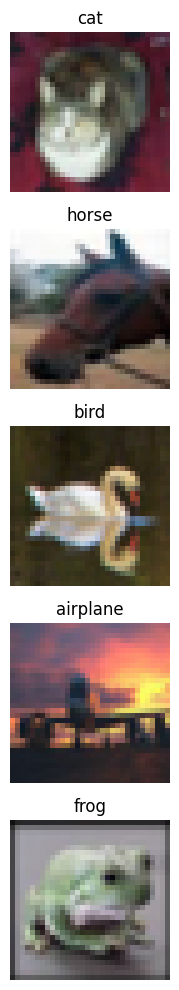

In [26]:
import numpy as np

# Mapping of label numbers to class names
label_names = {
    0: "airplane",
    1: "automobile",
    2: "bird",
    3: "cat",
    4: "deer",
    5: "dog",
    6: "frog",
    7: "horse",
    8: "ship",
    9: "truck"
}

# Picking 5 random indexes
random_indices = np.random.choice(len(x_train), size=5, replace=False)

# Plotting the images with labels
plt.figure(figsize=(2, 10))
for i, idx in enumerate(random_indices):
    plt.subplot(5, 1, i+1)
    plt.imshow(x_train[idx])
    plt.title(label_names[int(y_train[idx])])
    plt.axis('off')

plt.tight_layout()
plt.show()


### One hot encoding the target labels

In [27]:
y_subtrain_cat = to_categorical(y_subtrain, 10)
y_valid_cat = to_categorical(y_valid, 10)
y_test_cat = to_categorical(y_test, 10)

### Building the model architecture

- without regularization or dropout layer

In [28]:
model = Sequential()
model.add(Dense(512, activation = 'relu',input_shape = (3072,)))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))
model.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,738,890 (6.63 MB)

 Trainable params: 1,738,890 (6.63 MB)

 Non-trainable params: 0 (0.00 B)

### Compiling and running the model

In [29]:
from keras.callbacks import EarlyStopping

model.compile(loss= 'categorical_crossentropy',optimizer = Adam(learning_rate=0.001),metrics = ['accuracy'])

estop = EarlyStopping(monitor = 'val_loss', min_delta = 1e-4, mode = 'min', patience = 5, verbose = 1, restore_best_weights=True)
history = model.fit(x_subtrain_flat,y_subtrain_cat, batch_size=128, epochs = 500, verbose = 1, validation_data=(x_valid_flat,y_valid_cat), callbacks=[estop])

Epoch 1/500
352/352 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.2554 - loss: 2.0817 - val_accuracy: 0.3670 - val_loss: 1.7583
Epoch 2/500
352/352 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.3826 - loss: 1.7192 - val_accuracy: 0.4096 - val_loss: 1.6545
Epoch 3/500
352/352 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - accuracy: 0.4096 - loss: 1.6392 - val_accuracy: 0.4168 - val_loss: 1.6265
Epoch 4/500
352/352 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - accuracy: 0.4449 - loss: 1.5593 - val_accuracy: 0.4224 - val_loss: 1.6146
Epoch 5/500
352/352 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.4554 - loss: 1.5212 - val_accuracy: 0.4634 - val_loss: 1.5215
Epoch 6/500
352/352 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - accuracy: 0.4682 - loss: 1.4804 - val_accuracy: 0.4612 - val_loss: 1.5085
Epoch 7/500
352/352 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - accuracy: 0.4845 - loss: 1.4437 - val_accuracy: 0.4658 - val_loss: 1.4851
Epoch 8/500
352/352 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.4944 - loss: 1.4155 - 

In [30]:
score = model.evaluate(x_test_flat,y_test_cat, verbose = 1)
print("Test loss:", score[0])
print(f"Test Accuracy:{score[1]*100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5154 - loss: 1.3739
Test loss: 1.3852113485336304
Test Accuracy:51.97%


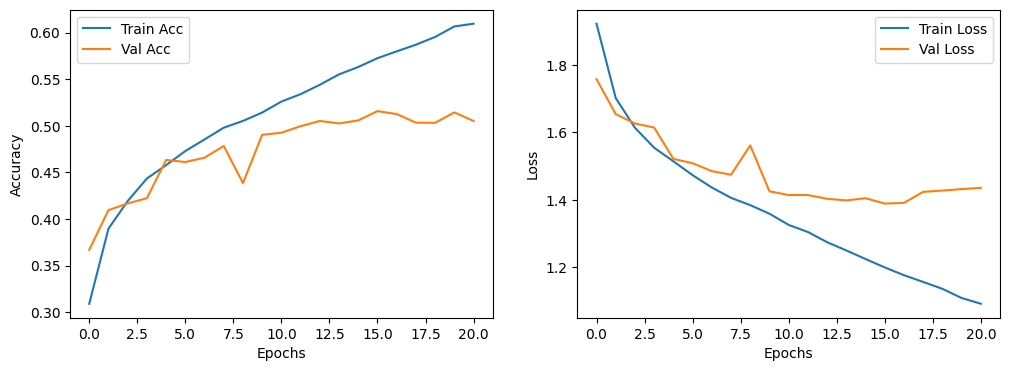

In [31]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


### Model with dropout layers

In [32]:
model = Sequential()
model.add(Dense(512, activation = 'relu',input_shape = (3072,)))
model.add(Dropout(0.3))
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation = 'softmax'))
model.summary()


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_19 (Dense)                │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,738,890 (6.63 MB)

 Trainable params: 1,738,890 (6.63 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
from keras.callbacks import EarlyStopping

model.compile(loss= 'categorical_crossentropy',optimizer = Adam(learning_rate=0.001),metrics = ['accuracy'])

estop = EarlyStopping(monitor = 'val_loss', min_delta = 1e-4, mode = 'min', patience = 5, verbose = 1, restore_best_weights=True)
history = model.fit(x_subtrain_flat,y_subtrain_cat, batch_size=128, epochs = 500, verbose = 1, validation_data=(x_valid_flat,y_valid_cat), callbacks=[estop])

Epoch 1/500
352/352 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.1807 - loss: 2.2071 - val_accuracy: 0.3238 - val_loss: 1.8934
Epoch 2/500
352/352 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.2852 - loss: 1.9350 - val_accuracy: 0.3202 - val_loss: 1.8745
Epoch 3/500
352/352 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.3015 - loss: 1.8916 - val_accuracy: 0.3638 - val_loss: 1.7975
Epoch 4/500
352/352 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - accuracy: 0.3119 - loss: 1.8670 - val_accuracy: 0.3634 - val_loss: 1.7696
Epoch 5/500
352/352 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.3225 - loss: 1.8450 - val_accuracy: 0.3570 - val_loss: 1.7812
Epoch 6/500
352/352 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - accuracy: 0.3302 - loss: 1.8304 - val_accuracy: 0.3758 - val_loss: 1.7633
Epoch 7/500
352/352 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - accuracy: 0.3340 - loss: 1.8129 - val_accuracy: 0.3810 - val_loss: 1.7565
Epoch 8/500
352/352 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - accuracy: 0.3451 - loss: 1.8041 

In [34]:
score = model.evaluate(x_test_flat,y_test_cat, verbose = 1)
print("Test loss:", score[0])
print(f"Test Accuracy:{score[1]*100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4278 - loss: 1.6321
Test loss: 1.6369125843048096
Test Accuracy:42.79%


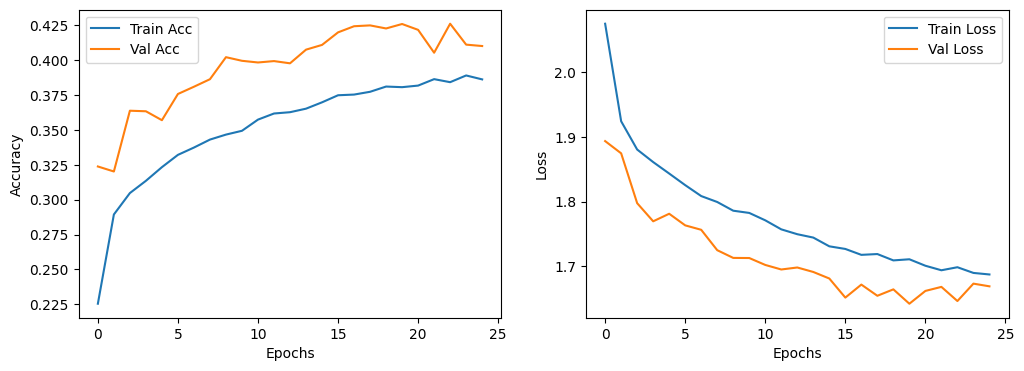

In [35]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


## Question 3. Next from keras.regularizers import l2

### Model building with l2 regularizer

In [36]:
model = Sequential()
model.add(Dense(512, activation = 'relu', kernel_regularizer=l2(0.0001),input_shape = (3072,)))
model.add(Dense(256, activation = 'relu',kernel_regularizer=l2(0.0001)))
model.add(Dense(128, activation = 'relu',kernel_regularizer=l2(0.005)))
model.add(Dense(10, activation = 'softmax'))
model.summary()


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_23 (Dense)                │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,738,890 (6.63 MB)

 Trainable params: 1,738,890 (6.63 MB)

 Non-trainable params: 0 (0.00 B)

### Without using early stopping

In [37]:
model.compile(loss= 'categorical_crossentropy',optimizer = Adam(learning_rate=0.001),metrics = ['accuracy'])

estop = EarlyStopping(monitor = 'val_loss', min_delta = 1e-4, mode = 'min', patience = 5, verbose = 1, restore_best_weights=True)
history = model.fit(x_subtrain_flat,y_subtrain_cat, batch_size=128, epochs = 500, verbose = 1, validation_data=(x_valid_flat,y_valid_cat), callbacks=[estop])

Epoch 1/500
352/352 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.2553 - loss: 2.6025 - val_accuracy: 0.3716 - val_loss: 1.9682
Epoch 2/500
352/352 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - accuracy: 0.3771 - loss: 1.9061 - val_accuracy: 0.4190 - val_loss: 1.7790
Epoch 3/500
352/352 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - accuracy: 0.4159 - loss: 1.7583 - val_accuracy: 0.4314 - val_loss: 1.7220
Epoch 4/500
352/352 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - accuracy: 0.4350 - loss: 1.6784 - val_accuracy: 0.4676 - val_loss: 1.6170
Epoch 5/500
352/352 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - accuracy: 0.4565 - loss: 1.6113 - val_accuracy: 0.4622 - val_loss: 1.6180
Epoch 6/500
352/352 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - accuracy: 0.4679 - loss: 1.5756 - val_accuracy: 0.4544 - val_loss: 1.6137
Epoch 7/500
352/352 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - accuracy: 0.4787 - loss: 1.5499 - val_accuracy: 0.4600 - val_loss: 1.5985
Epoch 8/500
352/352 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.4832 - loss: 1.5293 -

In [38]:
score = model.evaluate(x_test_flat,y_test_cat, verbose = 1)
print("Test loss:", score[0])
print(f"Test Accuracy:{score[1]*100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5204 - loss: 1.4501
Test loss: 1.4567960500717163
Test Accuracy:51.61%


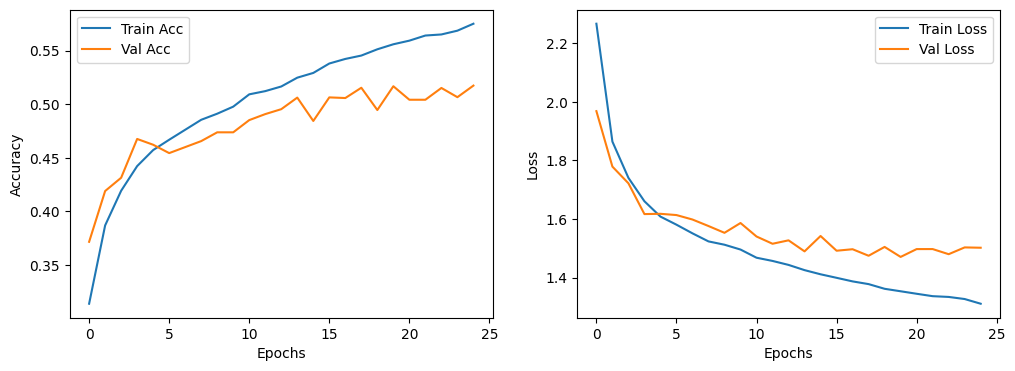

In [39]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


### using early stopping along with l2 regularization

In [40]:
estop = EarlyStopping(monitor = 'val_loss', min_delta = 1e-4, mode = 'min', patience = 5, verbose = 1, restore_best_weights=True)
history = model.fit(x_subtrain_flat,y_subtrain_cat, batch_size=128, epochs = 500, verbose = 1, validation_data=(x_valid_flat,y_valid_cat), callbacks=[estop])

Epoch 1/500
352/352 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.5652 - loss: 1.3301 - val_accuracy: 0.4984 - val_loss: 1.5603
Epoch 2/500
352/352 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.5633 - loss: 1.3336 - val_accuracy: 0.5030 - val_loss: 1.5436
Epoch 3/500
352/352 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - accuracy: 0.5672 - loss: 1.3255 - val_accuracy: 0.5118 - val_loss: 1.4963
Epoch 4/500
352/352 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.5742 - loss: 1.3156 - val_accuracy: 0.4996 - val_loss: 1.5386
Epoch 5/500
352/352 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - accuracy: 0.5724 - loss: 1.3093 - val_accuracy: 0.5086 - val_loss: 1.5058
Epoch 6/500
352/352 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.5819 - loss: 1.2856 - val_accuracy: 0.5030 - val_loss: 1.5206
Epoch 7/500
352/352 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - accuracy: 0.5764 - loss: 1.2972 - val_accuracy: 0.5168 - val_loss: 1.5215
Epoch 8/500
352/352 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - accuracy: 0.5907 - loss: 1.2719 - 

In [41]:
score = model.evaluate(x_test_flat,y_test_cat, verbose = 1)
print("Test loss:", score[0])
print(f"Test Accuracy:{score[1]*100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5239 - loss: 1.4569
Test loss: 1.465133547782898
Test Accuracy:52.07%


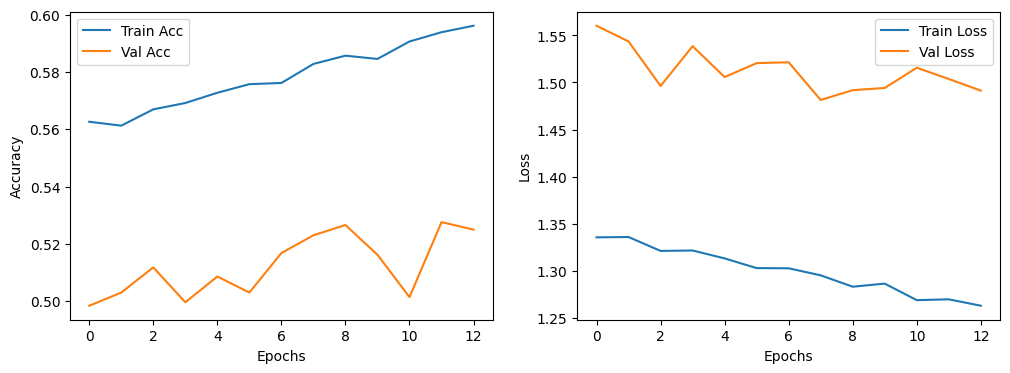

In [42]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


## Question 4: Now, let’s see how we can proceed to do perform some hyperparameter tuning and find out the appropriate parameter value. The following part is done for a very simple model with one hidden layer and an output layer. The number of neurons and the dropout parameter is being tuned to find appropriate ones.

In [43]:
import keras 
from keras.datasets import mnist 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.utils import to_categorical
from keras.optimizers import SGD,Adam
import keras_tuner as kt 

In [44]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()
print(x_train.shape)

x_train = x_train.reshape(-1,28*28).astype('float32')/255.0
x_test = x_test.reshape(-1,28*28).astype('float32')/255.0

print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(60000, 784)
(10000, 784)


In [45]:
y_train_ = to_categorical(y_train,10)
y_test_ = to_categorical(y_test,10)

def build_model(hp):
    model = Sequential()
    model.add(Flatten(input_shape= (28*28,)))

    units = hp.Int('units', min_value = 64, max_value = 512, step = 64)
    model.add(Dense(units,activation = 'relu'))
    dropout_rate = hp.Float('dropout',min_value = 0.0, max_value = 0.5, step = 0.1)
    model.add(Dropout(dropout_rate))
    model.add(Dense(10, activation = 'softmax'))

    model.compile(
        optimizer = SGD(), 
        loss = 'categorical_crossentropy',
        metrics = ['accuracy']
    )
    return model

In [46]:
tuner = kt.RandomSearch(
    build_model,
    objective = 'val_accuracy',
    max_trials = 10,
    executions_per_trial = 1,
    directory = 'mnist_tuning',
    project_name = 'dense_dropout_tune',
    overwrite=True
)

tuner.search(x_train,y_train_, epochs = 10, validation_split = 0.2,batch_size = 128,callbacks = [keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 5)])
best_model = tuner.get_best_models(num_models = 1)[0]

test_loss, test_acc = best_model.evaluate(x_test,y_test_)
print("Test Accuracy:",test_acc)

best_hps = tuner.get_best_hyperparameters(1)[0]
print("Best Units:", best_hps.get('units'))
print("Best dropout:",best_hps.get('dropout'))



Trial 10 Complete [00h 00m 15s]
val_accuracy: 0.9211666584014893

Best val_accuracy So Far: 0.9235833287239075
Total elapsed time: 00h 02m 53s
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9105 - loss: 0.3241
Test Accuracy: 0.9232000112533569
Best Units: 320
Best dropout: 0.2


In [47]:
best_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 320)            │       251,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 320)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         3,210 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 254,410 (993.79 KB)

 Trainable params: 254,410 (993.79 KB)

 Non-trainable params: 0 (0.00 B)

In [48]:
history = best_model.fit(x_train,y_train_, batch_size=128, epochs = 50, verbose = 1, validation_split=0.2,callbacks = [keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 5)])

Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9090 - loss: 0.3180 - val_accuracy: 0.9255 - val_loss: 0.2722
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9152 - loss: 0.3035 - val_accuracy: 0.9270 - val_loss: 0.2646
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9161 - loss: 0.2941 - val_accuracy: 0.9298 - val_loss: 0.2577
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9172 - loss: 0.2921 - val_accuracy: 0.9303 - val_loss: 0.2517
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9197 - loss: 0.2824 - val_accuracy: 0.9316 - val_loss: 0.2458
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9223 - loss: 0.2770 - val_accuracy: 0.9337 - val_loss: 0.2405
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9268 - loss: 0.2656 - val_accuracy: 0.9352 - val_loss: 0.2350
Epoch 8/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9239 - loss: 0.2645 - val_accuracy: 0.

In [49]:
score = best_model.evaluate(x_test,y_test_, verbose = 1)
print("Test loss:", score[0])
print(f"Test Accuracy:{score[1]*100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9556 - loss: 0.1555
Test loss: 0.13252055644989014
Test Accuracy:96.27%


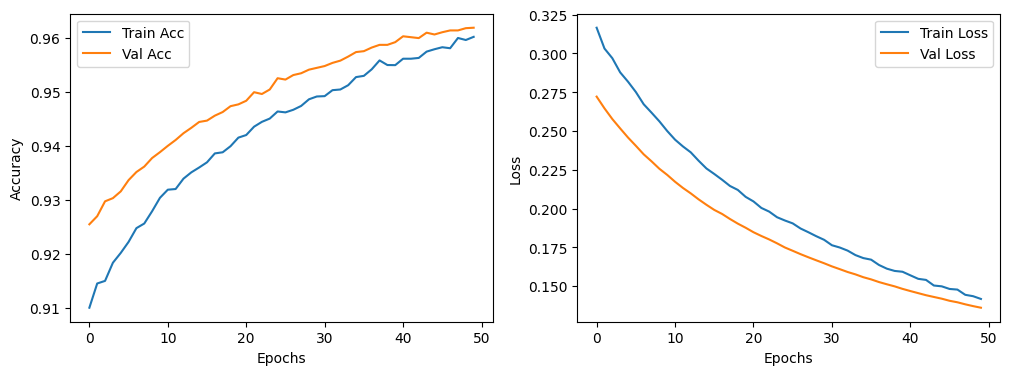

In [50]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


### Tuning further parameters like 
- Number of hidden layers
- units per layers 
- dropout per layer 
- optimizer type 
- learning rate 

In [51]:
from tensorflow import keras 
from keras.datasets import mnist 
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout 
from keras.utils import to_categorical
import keras_tuner as kt 
from keras.regularizers import l2
import numpy as np 

### Loading and preprocessing the dataset 

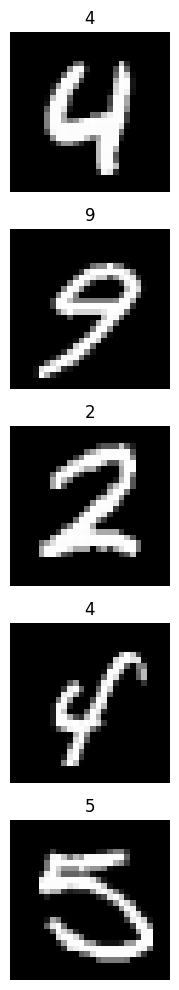

In [52]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

## Plotting some random images from the dataset
random_indices = np.random.choice(len(x_train), size=5, replace=False)
plt.figure(figsize=(2, 10))
for i, idx in enumerate(random_indices):
    plt.subplot(5, 1, i+1)
    plt.imshow(x_train[idx],cmap = 'gray')
    plt.title(int(y_train[idx]))
    plt.axis('off')

plt.tight_layout()
plt.show()

x_train = x_train.reshape(-1,28*28).astype('float32')/255.0
x_test = x_test.reshape(-1,28*28).astype('float32')/255.0
y_train_ = to_categorical(y_train,10)
y_test_ = to_categorical(y_test, 10)

### Building model for tuner
- with L2 regularization

In [53]:
def build_model(hp):
    model = Sequential()
    model.add(Flatten(input_shape = (784,)))
    
    ## Tuning the number of layers 
    for i in range(hp.Int('num_layers',1,3)):
        model.add(Dense(
            ## no of nodes in each layer
            units = hp.Int(f'units_{i}', min_value = 64, max_value = 512, step = 64),
            activation = 'relu',
            kernel_regularizer=l2(
                hp.Choice(f'l2_{i}', values = [0.0,1e-4,1e-3,1e-2])
            )
        ))
        ## Tuning the dropout rate
        model.add(Dropout(
            rate = hp.Float(f'dropout_{i}', min_value = 0.0,max_value = 0.5, step = 0.05)
        ))
        
    ## output layer 
    model.add(Dense(10, activation = 'softmax'))
    
    ## Tuning the optimizer type and the learning rate
    optimizer_choice = hp.Choice('optimizer', values = ['adam','sgd'])
    learning_rate = hp.Choice('learning_rate', values=[1e-2,1e-3,1e-4])
    
    if optimizer_choice == 'adam':
        optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    else:
        optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    
    model.compile(
        optimizer = optimizer,
        loss = 'categorical_crossentropy',
        metrics = ['accuracy']
    )
    return model


In [54]:
tuner = kt.RandomSearch(
    build_model,
    objective = 'val_accuracy',
    max_trials=20,
    executions_per_trial = 2,
    overwrite = True,
    directory = 'mnist_tuning',
    project_name = 'advanced_dense_tune'
)

tuner.search(
    x_train,y_train_,
    epochs = 10,
    validation_split = 0.2,
    batch_size = 128,
    callbacks = [keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 3,min_delta=1e-4, restore_best_weights = True)]
)


Trial 20 Complete [00h 00m 30s]
val_accuracy: 0.28724999725818634

Best val_accuracy So Far: 0.9781250059604645
Total elapsed time: 00h 16m 35s


In [55]:
# best model and hyperparameters
best_model = tuner.get_best_models(num_models=1)[0]
best_hps = tuner.get_best_hyperparameters(1)[0]
print("Best Hyperparameters:")
for key in best_hps.values.keys():
    print(f"{key}: {best_hps.get(key)}")

# Final training
history = best_model.fit(
    x_train, y_train_,
    batch_size=128,
    epochs=50,
    validation_split=0.2,
    callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience = 3,min_delta=1e-4, restore_best_weights = True)]
)

# Evaluate
score = best_model.evaluate(x_test, y_test_, verbose=1)
print("Test loss:", score[0])
print(f"Test Accuracy: {score[1]*100:.2f}%")

Best Hyperparameters:
num_layers: 3
units_0: 256
l2_0: 0.0
dropout_0: 0.30000000000000004
optimizer: adam
learning_rate: 0.001
units_1: 512
l2_1: 0.0
dropout_1: 0.1
units_2: 448
l2_2: 0.0001
dropout_2: 0.0
Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9851 - loss: 0.0591 - val_accuracy: 0.9788 - val_loss: 0.0916
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9868 - loss: 0.0522 - val_accuracy: 0.9793 - val_loss: 0.0876
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9856 - loss: 0.0532 - val_accuracy: 0.9787 - val_loss: 0.0891
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9869 - loss: 0.0471 - val_accuracy: 0.9801 - val_loss: 0.0915
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9880 - loss: 0.0465 - val_accuracy: 0.9793 - val_loss: 0.0898
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9778 - loss: 0.0878
Test loss: 0.07718071341514587
Test Accuracy: 98.14%


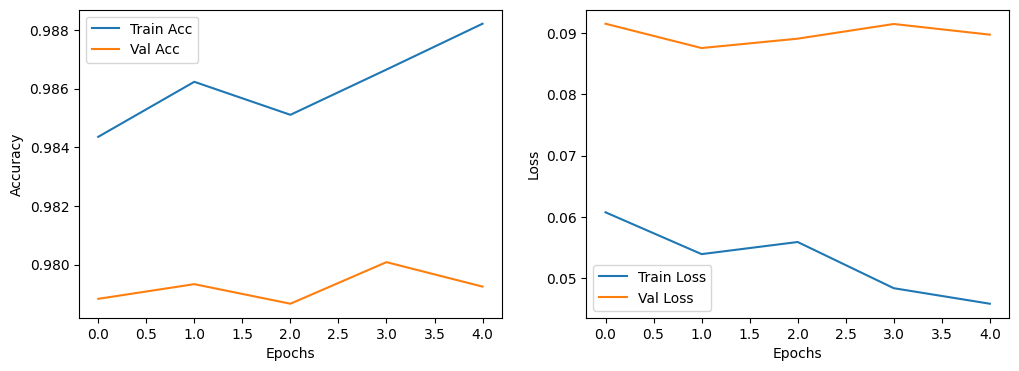

In [56]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


## Then later go back to the cifar10 dataset problem and come up with your best model

### hyper parameter tuning for cifar 10 dataset

### importing the necessary libraries

In [57]:
import numpy as np 
import matplotlib.pyplot as plt 
from tensorflow import keras 
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Input
from keras.regularizers import l2 
from keras.utils import to_categorical 
import keras_tuner as kt 

### loading the cifar10 dataset 

In [58]:

(x_train,y_train),(x_test,y_test) = cifar10.load_data()

# class label mapping 
label_map = {
    0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer',
    5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'
}

### Showing some sample images 

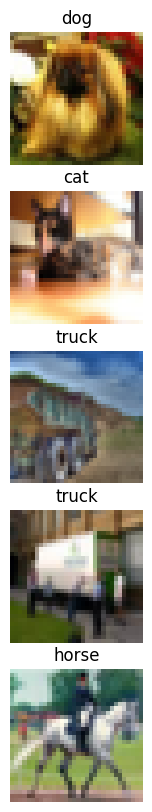

In [59]:
idx = np.random.choice(len(x_train), 5, replace = False)
plt.figure(figsize = (2,10))
for i, id in enumerate(idx):
    plt.subplot(5,1,i+1)
    plt.imshow(x_train[id])
    plt.title(label_map[int(y_train[id])])
    plt.axis('off')
plt.show()


### preprocessing the dataset


In [60]:
## normalizing 
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0
x_train = x_train.reshape(-1,32*32*3)
x_test = x_test.reshape(-1,32*32*3)

y_train_ = to_categorical(y_train,10) 
y_test_ = to_categorical(y_test,10)


### model building for hyperparameter tuning 

In [61]:
def build_model(hp):
    model = Sequential()
    model.add(Input(shape=(32*32*3,)))
    # Tune number of hidden layers (1–3)
    for i in range(hp.Int('num_layers', 1, 3)):
        model.add(Dense(
            units=hp.Int(f'units_{i}', min_value=128, max_value=512, step=64),
            activation='relu',
            kernel_regularizer=l2(hp.Choice(f'l2_{i}', values=[0.0, 1e-4, 1e-3]))
        ))
        model.add(Dropout(
            rate=hp.Float(f'dropout_{i}', min_value=0.0, max_value=0.5, step=0.1)
        ))
    
    # Output layer
    model.add(Dense(10, activation='softmax'))
    
    # Tune optimizer type & learning rate
    optimizer_choice = hp.Choice('optimizer', values=['adam', 'sgd'])
    learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    
    if optimizer_choice == 'adam':
        optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    else:
        optimizer = keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.9)
    
    model.compile(
        optimizer=optimizer,
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model


In [62]:
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1,
    overwrite=True,
    directory='cifar10_tuning',
    project_name='dense_dropout_l2_tune'
)

tuner.search(
    x_train, y_train_,
    epochs=20,
    validation_split=0.2,
    batch_size=128,
    callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience = 3,min_delta=1e-4, restore_best_weights = True)]
)

Trial 10 Complete [00h 01m 22s]
val_accuracy: 0.20059999823570251

Best val_accuracy So Far: 0.5169000029563904
Total elapsed time: 00h 12m 32s


### Best model and hyperparameters

In [63]:
best_model = tuner.get_best_models(num_models=1)[0]
best_hps = tuner.get_best_hyperparameters(1)[0]
print("\nBest Hyperparameters:")
for key in best_hps.values.keys():
    print(f"{key}: {best_hps.get(key)}")


Best Hyperparameters:
num_layers: 3
units_0: 384
l2_0: 0.0001
dropout_0: 0.1
optimizer: sgd
learning_rate: 0.01
units_1: 320
l2_1: 0.001
dropout_1: 0.1
units_2: 128
l2_2: 0.0
dropout_2: 0.0


### Training the best model

In [64]:
history = best_model.fit(
    x_train, y_train_,
    batch_size=128,
    epochs=50,
    validation_split=0.2,
    callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience = 3,min_delta=1e-4, restore_best_weights = True)]
)

Epoch 1/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.5608 - loss: 1.3661 - val_accuracy: 0.4981 - val_loss: 1.5471
Epoch 2/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.5558 - loss: 1.3684 - val_accuracy: 0.5067 - val_loss: 1.5259
Epoch 3/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.5577 - loss: 1.3547 - val_accuracy: 0.5179 - val_loss: 1.4900
Epoch 4/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.5693 - loss: 1.3283 - val_accuracy: 0.5103 - val_loss: 1.5069
Epoch 5/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.5712 - loss: 1.3270 - val_accuracy: 0.5167 - val_loss: 1.4978
Epoch 6/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.5786 - loss: 1.3023 - val_accuracy: 0.5223 - val_loss: 1.4850
Epoch 7/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.5784 - loss: 1.3036 - val_accuracy: 0.5225 - val_loss: 1.5013
Epoch 8/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.5848 - loss: 1.2859 - val_accu

### Evaluating the model 

In [65]:
score = best_model.evaluate(x_test, y_test_, verbose=1)
print("Test loss:", score[0])
print(f"Test Accuracy: {score[1]*100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5398 - loss: 1.4360
Test loss: 1.4406636953353882
Test Accuracy: 53.62%


### Accuracy and loss plot 

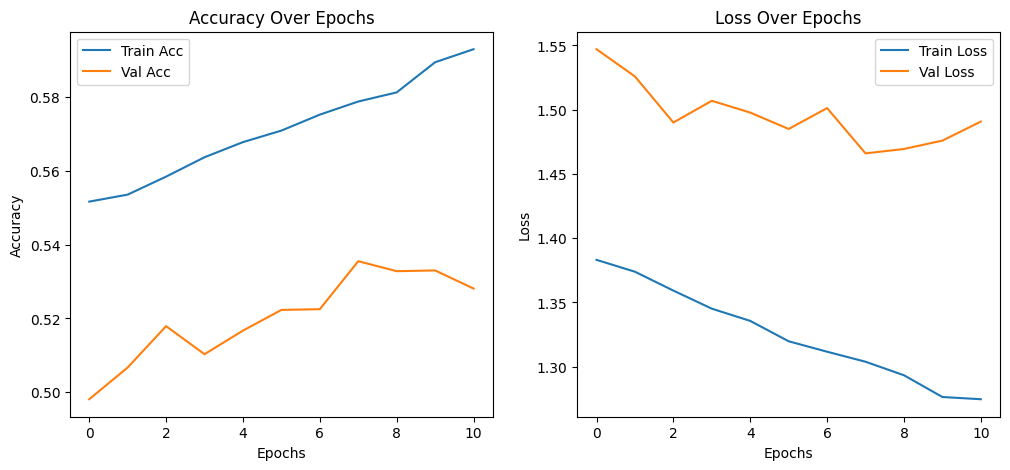

In [66]:
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Over Epochs')

plt.show()